# Tydzień Programisty 2021 - warsztaty Data Science

## Modelowanie Szeregów Czasowych - zadania

### Program

1. Czym są szeregi czasowe?
2. Opis szeregu czasowego.
3. Projekt #1: Rozkład szeregu.
4. Projekt #2: Losowanie.
5. Projekt #3: Model Naiwny.
6. Projekt #4: Regresja Wielomianowa.
7. Projekt #5: Wygładzanie wykładnicze.

### Projekt 1: Dekompozycja szeregu

1. (Najpierw zamontuj dysk Google'a). Wczytaj plik `ts_data.csv` ze swojego dysku przy pomocy pakietu `pandas` i jego funkcji `read_csv()`. Ustaw parametr `parse_dates` na `True`, ustaw `index_col` na `date0`.
2. Rozłóż jeden z szeregów czasowych (`cc1`, `cc2` albo `cc3`) na czynniki zgodnie z materiałami z zajęć.
3. Zwizualizuj wyniki w postaci kilku przebiegów.

In [74]:
# Miejsce na Twój kod

import pandas as pd


df = pd.read_csv('/content/drive/MyDrive/szkolenia/tp2021/ts_data.csv', parse_dates=True, index_col='date0')
df.index.freq = 'W'

In [75]:
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt

In [76]:
decomposed = seasonal_decompose(df['cc2'])

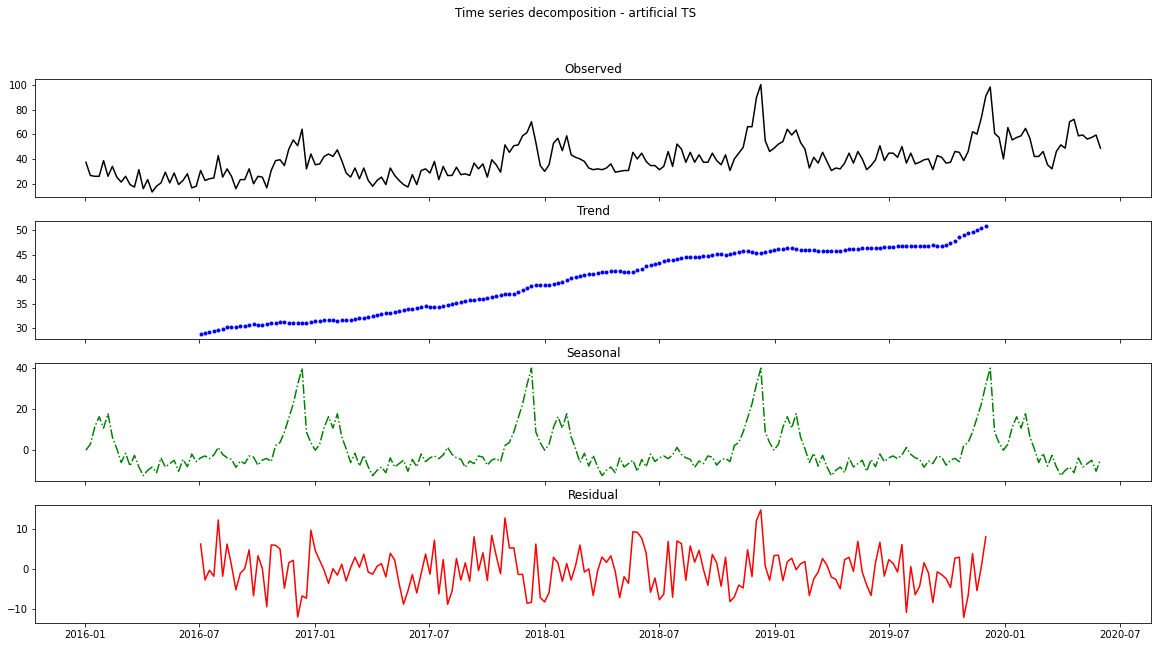

In [77]:
fig, axes = plt.subplots(ncols=1, nrows=4, sharex=True, figsize=(20, 10))
fig.suptitle('Time series decomposition - artificial TS')
axes[0].plot(decomposed.observed, color='black')
axes[1].plot(decomposed.trend, '.b')
axes[2].plot(decomposed.seasonal, '-.g')
axes[3].plot(decomposed.resid, '-r')
axes[0].title.set_text('Observed')
axes[1].title.set_text('Trend')
axes[2].title.set_text('Seasonal')
axes[3].title.set_text('Residual')

### Projekt 2: Losowanie

1. Napisz funkcję która losuje n wartości z przedziału [0, 100].
2. Napisz funkcję, która oblicza pierwiastek z średniego błędu kwadratowego dla dwóch wektorów. Oblicz RMSE między jednym z wybranych szeregów czasowych a wektorem losowych wartości stworzonych przy pomocy funkcji w kroku 1 (przyporządkuj tym wektorom znaczniki czasu z głównego zbioru).
3. Podziel szereg czasowy na zbiór treningowy i testowy (90% / 10%).
4. Oblicz Średnie RMSE między zbiorem testowym a wylosowanymi wartościami.

In [78]:
# Losowanie

import numpy as np


def draw_numbers(low, high, n=1):
  """
  number = (high - low) * [(random_value - 0) / (1 - 0)] + low
  """
  numbers = (high-low) * np.random.rand(n) + low
  return numbers

numb = draw_numbers(0, 100, 10)

In [79]:
numb

array([ 9.09593316, 76.75967111,  0.99930155, 68.74733839, 17.94560845,
       37.71900754, 98.80935638, 60.50827722, 11.15682445, 53.51482705])

In [80]:
# RMSE

def calculate_rmse(real, predicted):
  rmse = np.mean(np.sqrt((real - predicted)**2))
  return rmse

In [81]:
random_series = pd.Series(data=draw_numbers(0, 100, len(df)), index=df.index)

In [82]:
rmse_series = calculate_rmse(df['cc2'], random_series)
rmse_series

27.33063233014092

In [83]:
# Zbiór treningowy i testowy

limit = int(len(df) * 0.9)
train = df['cc2'].iloc[:limit]
test = df['cc2'].iloc[limit:]

print(df.index.freq)

<Week: weekday=6>


In [84]:
# Oblicz średnie rmse między zbiorem testowym a losowymi wartościami

# Rozwiązań tego zadania jest wiele

In [85]:
rmses = []

for val in test:
  rmses.append(calculate_rmse(val, draw_numbers(0, 100)))

In [86]:
rmses

[4.340624590427808,
 54.82647637094455,
 21.651208685106823,
 23.101408263947384,
 2.3716129647412245,
 53.56294086181839,
 52.10156267820135,
 31.727149771193904,
 48.07427272483766,
 26.413244116195457,
 16.524527967674537,
 11.94736729677113,
 60.69061565151621,
 15.725788983295214,
 13.530298380172312,
 18.315687102280997,
 41.93616571957375,
 8.349554723463555,
 37.08046335521072,
 19.039987177484697,
 15.716347750489504,
 22.80743708693447,
 38.29634955443194,
 9.900209520809646]

In [87]:
np.mean(rmses)

27.001304220730134

In [88]:
# ALBO

In [89]:
random_test_series = draw_numbers(0, 100, len(test))
rand_ts = pd.Series(data=random_series, index=test.index)

rmses = calculate_rmse(test, rand_ts)
rmses

24.321738176176613

In [90]:
# Powyżej inna wartość, bo losowaliśmy nowe wartości

### Projekt 3: Naiwny Model

1. Stwórz model, który uznaje, że wartość w kolejnym nieznanym okresie czasu jest równa ostatniej znanej wartości.
2. Oblicz RMSE predykcji, zakładając, że każda nowa obserwacja jest dostępna dla modelu (nowa obserwacja ze zbioru testowego => ostatnia znana wartość).

In [91]:
def naive_model(historical):
  return historical[-1]

In [92]:
naive_series = test.shift(1)
naive_series[0] = train[-1]

In [93]:
naive_series

date0
2019-12-22    60.927152
2019-12-29    57.615894
2020-01-05    40.397351
2020-01-12    65.562914
2020-01-19    55.629139
2020-01-26    57.615894
2020-02-02    58.940397
2020-02-09    64.900662
2020-02-16    56.953642
2020-02-23    42.384106
2020-03-01    42.384106
2020-03-08    46.357616
2020-03-15    35.761589
2020-03-22    32.450331
2020-03-29    46.357616
2020-04-05    51.655629
2020-04-12    49.006623
2020-04-19    70.198675
2020-04-26    72.185430
2020-05-03    58.940397
2020-05-10    59.602649
2020-05-17    56.291391
2020-05-24    57.615894
2020-05-31    59.602649
Freq: W-SUN, Name: cc2, dtype: float64

In [94]:
rmse = calculate_rmse(test, naive_series)
rmse

7.560706401766002

### Projekt 4: Model Regresji Wielomianowej

**Korzystając z narzędzi scikit-learn i statsmodels zbuduj model predykcyjny oparty na regresji wielomianowej od poziomu 1 do poziomu 4, bazujący na 5 ostatnich rekordach ze zbioru treningowego, wykrywający 5 pierwszych wartości zbioru testowego.**

1. Wykorzystaj funkcję `poly_model()` stworzoną w części teoretycznej.

2. Napisz funkcję, która tworzy obiekt PolynomialFeatures zadanego poziomu i modeluje przebieg szeregu przy wykorzystaniu klasy OLS. Opieraj się na przykładach z zajęć. Funkcja powinna zwracać tylko przewidziane wartości.

3. Stwórz ramkę danych z predykcjami dla każdego wielomianu.

4. Oblicz RMSE dla każdego wielomianu.

In [110]:
from sklearn.preprocessing import PolynomialFeatures
from statsmodels.api import OLS


def poly_model(training, level, steps_ahead):
  if training.index.freq is None:
    raise ValueError('Frequency of a training set cannot be None')
  base = np.arange(0, len(training))
  features = PolynomialFeatures(degree=level)
  transformed = features.fit_transform(base.reshape(-1, 1))
  model = OLS(training, transformed).fit()

  x_pred = np.arange(len(training), len(training) + steps_ahead)
  _transformed = features.fit_transform(x_pred.reshape((-1, 1)))
  predicted = model.predict(_transformed)

  new_index = pd.date_range(start=training.index[-1],
                            periods=steps_ahead + 1,
                            freq=training.index.freq)[1:]
  
  y_pred = pd.Series(data=predicted, index=new_index)
  y_pred.name = training.name
  y_pred.index.freq = training.index.freq

  return y_pred

In [111]:
levels = [1, 2, 3, 4]

predictions = []

for lvl in levels:
  predicted = poly_model(train[-5:], lvl, 5)
  predictions.append(predicted)

In [112]:
# Ramka danych

polydf = pd.concat(predictions, axis=1)
polydf.columns = ['level' + str(x) for x in levels]

In [113]:
polydf.head()

,level1,level2,level3,level4
2019-12-22,84.437086,29.139073,-38.543046,-75.496689
2019-12-29,87.019868,-23.576159,-226.622517,-386.754967
2020-01-05,89.602649,-92.090823,-527.190161,-968.874172
2020-01-12,92.185430,-176.404920,-964.418165,-1938.410596
2020-01-19,94.768212,-276.518448,-1562.478713,-3432.450331


In [114]:
# RMSE

In [115]:
for c in polydf.columns:
  print(f'RMSE dla poziomu {c} wynosi {calculate_rmse(test[:5], polydf[c])}')

RMSE dla poziomu level1 wynosi 34.23841059602658
RMSE dla poziomu level2 wynosi 163.25449385052008
RMSE dla poziomu level3 wynosi 719.2147587511823
RMSE dla poziomu level4 wynosi 1415.7615894039748


### Projekt 5: Model Holt-Winters

**Korzystając z narzędzi statsmodels zbuduj model predykcyjny oparty na modelu Holt-Winters.**

1. Z pakietu `statsmodels.tsa.holtwinters` zaimportuj `ExponentialSmoothing`.

2. Stwórz funkcję do prognozowania opartą na modelu Holt-Winters, z założeniami, że trend jest typu addytywnego, a liczba rekordów per sezon (`seasonal_periods`) wynosi 54.

3. Przetestuj RMSE.

In [116]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [121]:
model = ExponentialSmoothing(train, trend='add', freq='W', seasonal_periods=54)
fitted = model.fit()
predicted = fitted.forecast(5)

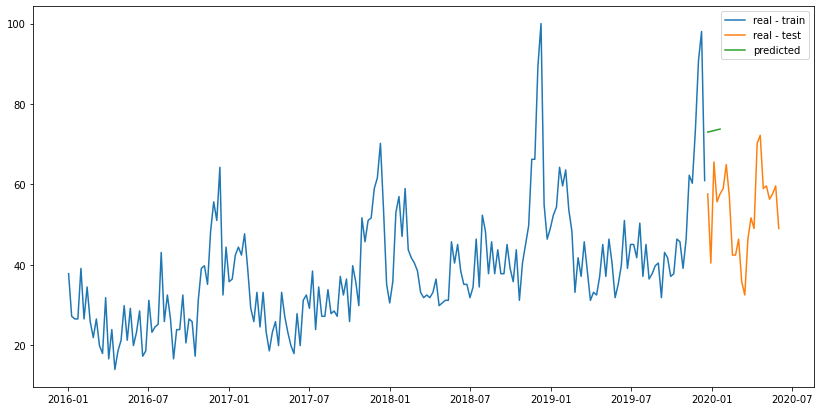

In [123]:
plt.figure(figsize=(14, 7))
plt.plot(train)
plt.plot(test)
plt.plot(predicted)
plt.legend(['real - train', 'real - test', 'predicted'])
plt.show()

In [124]:
calculate_rmse(test[:5], predicted)

18.002723565297735